<h1 align="center"> Sentiment Analysis </h1> 


In [25]:
# load the small embedding file
import gensim
small_model = gensim.models.KeyedVectors.load_word2vec_format('/Users/Ashrakat/Desktop/small-embeddings.txt', binary=False)

In [26]:
#general pipeline + embedd



import codecs, nltk, string
from nltk.corpus import stopwords

exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')

# input should be a string, you convert text in a doc-embedding
def text_embedding(text):
    
    #it depends if the words are lowercased or not in the word embeddings that you use, if they are not skip this step
    text = text.lower()
    
    text = nltk.word_tokenize(text)
  
    # remove numbers
    text = [token for token in text if token not in exclude and token.isalpha()]

    # remove stopwords (not essential)
    text = [token for token in text if token not in stop_word_list]

    article_embedd = []
    
    # you take all embeddings
    for word in text:
            try:
                embed_word = small_model[word]
                article_embedd.append(embed_word)
            except KeyError:
                continue
    
    # then you average them
    avg = [float(sum(col))/len(col) for col in zip(*article_embedd)]
    
    return avg

In [27]:
#if we want to take a look using pandas - just for visualization
import pandas as pd
sentiment = pd.read_csv ("/Users/Ashrakat/Downloads/yelp-test.tsv", sep="\t",header=None)
sentiment=sentiment[1:]
sentiment.head()

0                                                  1
1  2  Contrary to other reviews, I have zero complai...
2  1  Last summer I had an appointment to get new ti...
3  2  Friendly staff, same starbucks fair you get an...
4  1  The food is good. Unfortunately the service is...
5  2  Even when we didn't have a car Filene's Baseme...

In [28]:
sentiment.to_csv('/Users/Ashrakat/Downloads/yelp-test.tsv', index= False,sep="\t")

In [29]:
# open YELP product reviews dataset
# we are using only the "small" test-set, you can also train on the large training set if you'd like
import codecs

sentiment_dataset = codecs.open("/Users/Ashrakat/Downloads/yelp-test.tsv","r","utf-8").read().strip().split("\n")

print (sentiment_dataset[0])
print (" ")
print (sentiment_dataset[1])

0	1
 
2	Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \nAnd they just renovated the waiting room. It looks a lot better than it did in previous years.


In [30]:
# first, we define two folders, "corpus" - with the text and "labels", with the labels

corpus = []
labels = []

# be careful with this, the dataset is huge!
#for line in sentiment_dataset:
for line in sentiment_dataset[1:1000]:
    #its a tab seperated file
    text = line.split("\t")[1].replace('"','')# remove the  - replace with nothing
    label = line.split("\t")[0].replace('"','').replace("1","-1").replace("2","1") #change values
    
    corpus.append(text)
    labels.append(label)

In [31]:
corpus

["Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \\nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \\nAnd they just renovated the waiting room. It looks a lot better than it did in previous years.",
 "Last summer I had an appointment to get new tires and had to wait a super long time. I also went in this week for them to fix a minor problem with a tire they put on. They \\fixed\\ it for free, and the very next morning I had the same issue. I called to complain, and the \\manager\\ didn't even apologize!!! 

In [32]:
labels

['1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '1',

# Sentiment Analysis using Word list based approaches

"One of the simplest sentiment analysis approaches:
- compares the words of a text against a labeled word list
- where each word has been scored for valence, — **a “sentiment lexicon”** "

Check Paper by Finn ˚Arup Nielsen: http://www2.imm.dtu.dk/pubdb/edoc/imm6006.pdf

In [33]:
# AFINN Dictionary for Sentiment Analysis: https://github.com/fnielsen/afinn
#https://github.com/fnielsen/afinn/blob/master/afinn/data/AFINN-111.txt

#!pip install afinn

from afinn import Afinn

afinn = Afinn()

print (afinn.score("This is bad fake news"))

print (afinn.score("The sun is shining, what a beautiful day"))

print (afinn.score("That movie is horrible and beautiful at the same time"))

-6.0
3.0
0.0


In [34]:
pred = []

#for sentence in the corpus predict its scores
for review in corpus:
    score = afinn.score(review)
    
    #I only want two labels for each of my sentences
    #if the score is below 0 give me a value -1, and if over 0 give me the value +1
    if score < 0.0:
        pred.append("-1")
    else:
        pred.append("1")

In [35]:
pred

['1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',

In [36]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
print (precision_recall_fscore_support(labels, pred, average="macro"))

(0.7589475384175808, 0.6672953602414183, 0.6273851376847133, None)


# Sentiment Analysis as a Classification Problem



In [37]:
import codecs

sentiment_dataset = codecs.open("/Users/Ashrakat/Downloads/yelp-test.tsv","r","utf-8").read().strip().split("\n")

print (sentiment_dataset[0])
print (" ")
print (sentiment_dataset[1])

0	1
 
2	Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \nAnd they just renovated the waiting room. It looks a lot better than it did in previous years.


In [38]:
corpus = []
labels = []

# be careful with this, the dataset is huge!
#for line in sentiment_dataset:
for line in sentiment_dataset[1:1000]:
    
    #its a tab seperated file
    text = line.split("\t")[1].replace('"','')# remove the  - replace with nothing
    label = line.split("\t")[0].replace('"','').replace("1","-1").replace("2","1") #change values
    
    # as usual, we use text-embeddings
    text = text_embedding(text)
    
    if len(text)>0:
        corpus.append(text)
        labels.append(label)
print ("ready!")


ready!


In [39]:
import numpy as np

X = np.array(corpus)
y = np.array(labels)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [41]:
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred_log_g = reg_log.predict(X_test)

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
from sklearn.naive_bayes import GaussianNB

reg_nb = GaussianNB() 
reg_nb.fit(X_train, y_train)
y_pred_nb_g = reg_nb.predict(X_test)

In [43]:
from sklearn.svm import SVC

reg_svc = SVC()
reg_svc.fit(X_train, y_train)
y_pred_svm_g = reg_svc.predict(X_test)


/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [44]:
from sklearn.neighbors import KNeighborsClassifier
reg_knn = KNeighborsClassifier(n_neighbors = 5)
reg_knn.fit(X_train, y_train)
y_pred_kc_g = reg_knn.predict(X_test)

In [45]:
from sklearn import metrics
print("Logistic Regression")
print(metrics.classification_report(y_test, y_pred_log_g))
print("SVM")
print(metrics.classification_report(y_test, y_pred_svm_g))
print("Naive Bayes")
print(metrics.classification_report(y_test, y_pred_nb_g))
print("K-Nearest Neighbor")
print(metrics.classification_report(y_test, y_pred_kc_g))


Logistic Regression
              precision    recall  f1-score   support

          -1       0.79      0.79      0.79       117
           1       0.71      0.71      0.71        83

   micro avg       0.76      0.76      0.76       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.76      0.76      0.76       200

SVM
              precision    recall  f1-score   support

          -1       0.81      0.78      0.79       117
           1       0.70      0.73      0.72        83

   micro avg       0.76      0.76      0.76       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.76      0.76      0.76       200

Naive Bayes
              precision    recall  f1-score   support

          -1       0.77      0.75      0.76       117
           1       0.66      0.69      0.67        83

   micro avg       0.72      0.72      0.73       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.73      0.72     

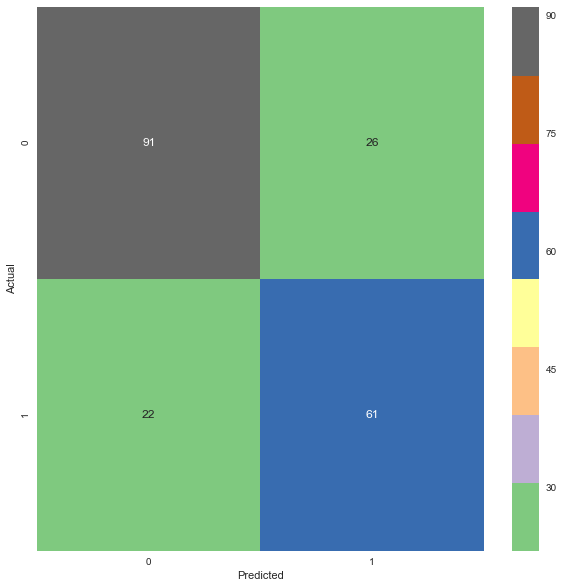

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_svm_g, )
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap="Accent")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## KEEP only nouns

In [47]:
#pipeline + embedd
import codecs, nltk, string
from nltk.corpus import stopwords

exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')

# input should be a string, you convert text in a doc-embedding
def text_embedding(text):
    
    #it depends if the words are lowercased or not in the word embeddings that you use, if they are not skip this step
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    text = nltk.pos_tag(text)
    
    text=[word for word,pos in text if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
    
    # remove numbers
    text = [token for token in text if token not in exclude and token.isalpha()]

    # remove stopwords (not essential)
    text = [token for token in text if token not in stop_word_list]

    article_embedd = []
    
    # you take all embeddings
    for word in text:
            try:
                embed_word = small_model[word]
                article_embedd.append(embed_word)
            except KeyError:
                continue
    
    # then you average them
    avg = [float(sum(col))/len(col) for col in zip(*article_embedd)]
    
    return avg

In [48]:
corpus22 = []
labels22 = []

# be careful with this, the dataset is huge!
#for line in sentiment_dataset:
for line in sentiment_dataset[1:1000]:
    #its a tab seperated file
    text = line.split("\t")[1].replace('"','')# remove the  - replace with nothing
    label = line.split("\t")[0].replace('"','').replace("1","-1").replace("2","1") #change values
    # as usual, we use text-embeddings
    text = text_embedding(text)
    
    if len(text)>0:
        corpus22.append(text)
        labels22.append(label)
print ("ready!")


ready!


In [49]:
import numpy as np

X1 = np.array(corpus22)
y1 = np.array(labels22)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 20)

In [50]:
#Models

from sklearn.linear_model import LogisticRegression
reg_log_n = LogisticRegression()
reg_log_n.fit(X_train, y_train)
y_pred_log_n = reg_log_n.predict(X_test)

from sklearn.naive_bayes import GaussianNB
reg_nb_n = GaussianNB() 
reg_nb_n.fit(X_train, y_train)
y_pred_nb_n = reg_nb_n.predict(X_test)


from sklearn.svm import SVC
reg_svc_n = SVC()
reg_svc_n.fit(X_train, y_train)
y_pred_svm_n = reg_svc_n.predict(X_test)

from sklearn.neighbors import KNeighborsClassifier
reg_knn_n = KNeighborsClassifier(n_neighbors = 5)
reg_knn_n.fit(X_train, y_train)
y_pred_kc_n = reg_knn_n.predict(X_test)


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [51]:
from sklearn import metrics
print("Logistic Regression")
print(metrics.classification_report(y_test, y_pred_log_n))
print("SVM")
print(metrics.classification_report(y_test, y_pred_svm_n))
print("Naive Bayes")
print(metrics.classification_report(y_test, y_pred_nb_n))
print("K-Nearest Neighbor")
print(metrics.classification_report(y_test, y_pred_kc_n))


Logistic Regression
              precision    recall  f1-score   support

          -1       0.58      0.74      0.65        90
           1       0.73      0.55      0.63       110

   micro avg       0.64      0.64      0.64       200
   macro avg       0.65      0.65      0.64       200
weighted avg       0.66      0.64      0.64       200

SVM
              precision    recall  f1-score   support

          -1       0.54      0.82      0.65        90
           1       0.74      0.42      0.53       110

   micro avg       0.60      0.60      0.60       200
   macro avg       0.64      0.62      0.59       200
weighted avg       0.65      0.60      0.59       200

Naive Bayes
              precision    recall  f1-score   support

          -1       0.56      0.71      0.62        90
           1       0.69      0.54      0.61       110

   micro avg       0.61      0.61      0.61       200
   macro avg       0.63      0.62      0.61       200
weighted avg       0.63      0.61     

# Excercises

**Excercise 1**

- Use the Yelp review dataset, its huge, you can work with a part of it (ex. 1000 articles)
- Check our example when we analyzed the sentiment using word-based approches employing Afinn.
- Instead of taking the entire text, now you will process it (e.g., lemmat, pos, keep stopwords, etc) and see if you can improve the performance of the analysis
- Now try assigning neutral sentences as negative and see if this will improve your results

Extra:

- maybe try to see if different pipelines will improve your results


In [52]:

from nltk.stem.wordnet import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()


# input should be a string
def nlp_pipeline(text):
    
    # if you want you can split in sentences - i'm usually skipping this step
    # text = nltk.sent_tokenize(text) 
    
    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
    
    # pos tagger
    text = nltk.pos_tag(text)

    # lemmatizer
    text = [wordnet_lemmatizer.lemmatize(token.lower(),"v")if "V" in pos else wordnet_lemmatizer.lemmatize(token.lower()) for token,pos in text]
    
    # remove punctuation and numbers
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    # remove stopwords - be careful with this step    
    text = " ".join([token for token in text if token not in stop_word_list])

    return text

In [53]:
import codecs

sentiment_dataset = codecs.open("/Users/Ashrakat/Downloads/yelp-test.tsv","r","utf-8").read().strip().split("\n")

print (sentiment_dataset[0])
print (" ")
print (sentiment_dataset[1])

0	1
 
2	Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \nAnd they just renovated the waiting room. It looks a lot better than it did in previous years.


In [54]:
corpus1 = []
labels = []

# be careful with this, the dataset is huge!
#for line in sentiment_dataset:
for line in sentiment_dataset[1:1000]:
    text = line.split("\t")[1].replace('"','')
    label = line.split("\t")[0].replace('"','').replace("1","-1").replace("2","1")
    text = nlp_pipeline(text)
    
    corpus1.append(text)
    labels.append(label)

In [55]:
corpus1

['contrary review zero complaint service price get tire service past year compare experience place like pep boy guy experienced know one place feel like take advantage gender auto mechanic notorious capitalize ignorance car suck bank account dry service road coverage well explain let decide renovate wait room look lot better previous year',
 'last summer appointment get new tire wait super long time also go week fix minor problem tire put free next morning issue call complain even apologize frustrated never go back seem overprice',
 'friendly staff starbucks fair get anywhere else sometimes line get long',
 'food good unfortunately service hit miss main issue seem kitchen waiter waitress often apologetic long wait pretty obvious avoid table take initial order avoid hearing complaint',
 'even car filene basement worth bus trip waterfront always find something usually find thing spend better still always still wear clothes shoe month later kind suspect best shopping pittsburgh much bette

In [56]:
pred1 = []

for review in corpus1:
    score = afinn.score(review)
    
    if score < 0.0:
        pred1.append("-1")
    else:
        pred1.append("1")

In [57]:
print (precision_recall_fscore_support(labels, pred, average="macro"))
print (precision_recall_fscore_support(labels, pred1, average="macro"))

(0.7589475384175808, 0.6672953602414183, 0.6273851376847133, None)
(0.7498215510364037, 0.6432578633514451, 0.5926605504587156, None)


In [58]:
pred2 = []

for review in corpus1:
    score = afinn.score(review)
    #assign neutral to negative!
    if score < 0.1:
        pred2.append("-1")
    else:
        pred2.append("1")

In [59]:
print (precision_recall_fscore_support(labels, pred, average="macro"))
print (precision_recall_fscore_support(labels, pred1, average="macro"))
print (precision_recall_fscore_support(labels, pred2, average="macro"))

(0.7589475384175808, 0.6672953602414183, 0.6273851376847133, None)
(0.7498215510364037, 0.6432578633514451, 0.5926605504587156, None)
(0.744177915953955, 0.6695646765170911, 0.6351351351351351, None)


** Excercise 2 - Dictionary based Sentiment Analysis with German Data**

1. load data (sputnikgerman20.tsv)
2. keep pnly date,title,content {2,3,4}
3. check if there are any missing values and remove them
4. create new column that includes title and content

Now you have dictionaries of positive and negative words for the sentiment analysis (SentiWS_v1.8c_Negative.txt and SentiWS_v1.8c_Positive.txt)

5. please use your dictionaries to create 2 columns that count the number of positive words and the second one counts the number of positive words

6. create a last column that will mark if the sentiment overall was positive or negative


You can use Pandas or anything else you prefer


In [60]:
sputnik = pd.read_csv("/Users/Ashrakat/Desktop/sputnikgerman20.tsv",header=None, encoding='utf-8',delimiter='\t',error_bad_lines=False)
sputnik=sputnik[[2,3,4]]
sputnik

2                                                  3  \
0   20160107  FDP-Chef Lindner: Merkels Flüchtlingspolitik f...   
1   20150210  Experte: Rund 1,3 Millionen wehrpflichtige Ukr...   
2   20181117  So präzisiert Nahles ihre Idee für Hartz IV-Al...   
3   20181109  Trump beschränkt drastisch Asylgewährung für i...   
4   20160306  Österreich drängt auf deutsches Flüchtlingskon...   
5   20151016  Migrationskrise: Warschau wehrt sich gegen Mer...   
6   20151020       Flüchtlingskrise: Ist Abriegeln eine Lösung?   
7   20140106    Großbritannien will EU-Freizügigkeit verhindern   
8   20180813  Rückkehr von Flüchtlingen: Syrischer Minister ...   
9   20170219                         USA verschärfen Asyl-Recht   
10  20151228     Dänemark will die Flüchtlingskonvention ändern   
11  20160614  Glaube darf nicht über Gesetz stehen: Bundesju...   
12  20181210           Gibt es ein Menschenrecht auf Migration?   
13  20151102  Kabul nimmt abgelehnte Asylbewerber aus Deutsc...   
14  20170307  EuGH-Urteil: Keine \humanitären Visa\" in EU-A...   
15  20170207  Kalifornien und Trump erklären einander den Kr...   
16  20180619  Kinder von Eltern zu trennen ist skrupellos – ...   
17  20180914  EU will Ungarn „Recht auf Kontrolle eigener Gr...   
18  20131106    Festung Europa - von Migranten und Flüchtlingen   
19  20170715  Selbstanzeigen unter Flüchtlingen „wegen Terro...   

                                                    4  
0   Der Satz „Wir schaffen das“ der Bundeskanzleri...  
1   In letzter Zeit sei knapp einer halben Million...  
2   {                    \vars\": {               ...  
3   {                    \vars\": {               ...  
4   {                    \vars\": {               ...  
5   {                    \vars\": {               ...  
6   {                    \vars\": {               ...  
7   Foto: EPA STIMME RUSSLANDS Die Regierung Großb...  
8   Der syrische Minister für lokale Verwaltung un...  
9   Nach dem US-Gesetz „Immigration and Nationalit...  
10  {                    \vars\": {               ...  
11  Bundesjustizminister Heiko Maas will Mehrfach-...  
12  {                    \vars\": {               ...  
13  {                    \vars\": {               ...  
14  Die Behörde argumentierte, dass sich die Famil...  
15  „Das ist lächerlich“, so Trump über Kalifornie...  
16  {                    \vars\": {               ...  
17  Das EU-Rechtsstaatsverfahren gegen Ungarn stel...  
18  Foto: Aziz Bozkurt STIMME RUSSLANDS Flüchtling...  
19  Mehr als 408.000 Asylanträge hat das Bundesamt...

In [61]:
sputnik2 = sputnik[sputnik.isna().any(axis=1)]
sputnik2

Empty DataFrame
Columns: [2, 3, 4]
Index: []

In [62]:
#create a content column that includes titke and content
sputnik.columns = ['date', 'title',"content1"]
sputnik["content"] = sputnik["title"] +[" "]+ sputnik["content1"] 
sputnik.head()

date                                              title  \
0  20160107  FDP-Chef Lindner: Merkels Flüchtlingspolitik f...   
1  20150210  Experte: Rund 1,3 Millionen wehrpflichtige Ukr...   
2  20181117  So präzisiert Nahles ihre Idee für Hartz IV-Al...   
3  20181109  Trump beschränkt drastisch Asylgewährung für i...   
4  20160306  Österreich drängt auf deutsches Flüchtlingskon...   

                                            content1  \
0  Der Satz „Wir schaffen das“ der Bundeskanzleri...   
1  In letzter Zeit sei knapp einer halben Million...   
2  {                    \vars\": {               ...   
3  {                    \vars\": {               ...   
4  {                    \vars\": {               ...   

                                             content  
0  FDP-Chef Lindner: Merkels Flüchtlingspolitik f...  
1  Experte: Rund 1,3 Millionen wehrpflichtige Ukr...  
2  So präzisiert Nahles ihre Idee für Hartz IV-Al...  
3  Trump beschränkt drastisch Asylgewährung für i...  
4  Österreich drängt auf deutsches Flüchtlingskon...

In [63]:

exclude = set(string.punctuation)
stop_word_list = stopwords.words('german')

# input should be a string
def nlp_pipeline(text):
    
    text = nltk.word_tokenize(text) #tokenization 
     #word_lower
    text = [word.lower() for word in text]
    # remove punctuation and numbers
    text = [token for token in text if token not in exclude and token.isalpha()] 
    # remove stopwords - be careful with this step
    text = [token for token in text if token not in stop_word_list]
    # lemmatizer - remove
    #text=[wordnet_lemmatizer.lemmatize(word) for word in text]
    
    # the output is text
    return text



In [64]:
sputnik["nlpprocessed"]=sputnik['content'].apply(nlp_pipeline)
sputnik.head()

date                                              title  \
0  20160107  FDP-Chef Lindner: Merkels Flüchtlingspolitik f...   
1  20150210  Experte: Rund 1,3 Millionen wehrpflichtige Ukr...   
2  20181117  So präzisiert Nahles ihre Idee für Hartz IV-Al...   
3  20181109  Trump beschränkt drastisch Asylgewährung für i...   
4  20160306  Österreich drängt auf deutsches Flüchtlingskon...   

                                            content1  \
0  Der Satz „Wir schaffen das“ der Bundeskanzleri...   
1  In letzter Zeit sei knapp einer halben Million...   
2  {                    \vars\": {               ...   
3  {                    \vars\": {               ...   
4  {                    \vars\": {               ...   

                                             content  \
0  FDP-Chef Lindner: Merkels Flüchtlingspolitik f...   
1  Experte: Rund 1,3 Millionen wehrpflichtige Ukr...   
2  So präzisiert Nahles ihre Idee für Hartz IV-Al...   
3  Trump beschränkt drastisch Asylgewährung für i...   
4  Österreich drängt auf deutsches Flüchtlingskon...   

                                        nlpprocessed  
0  [lindner, merkels, flüchtlingspolitik, führt, ...  
1  [experte, rund, millionen, wehrpflichtige, ukr...  
2  [präzisiert, nahles, idee, hartz, http, u, amp...  
3  [trump, beschränkt, drastisch, asylgewährung, ...  
4  [österreich, drängt, deutsches, flüchtlingskon...

In [65]:
sputnik['liststring'] = [','.join(map(str, l)) for l in sputnik['nlpprocessed']]
sputnik.head()

date                                              title  \
0  20160107  FDP-Chef Lindner: Merkels Flüchtlingspolitik f...   
1  20150210  Experte: Rund 1,3 Millionen wehrpflichtige Ukr...   
2  20181117  So präzisiert Nahles ihre Idee für Hartz IV-Al...   
3  20181109  Trump beschränkt drastisch Asylgewährung für i...   
4  20160306  Österreich drängt auf deutsches Flüchtlingskon...   

                                            content1  \
0  Der Satz „Wir schaffen das“ der Bundeskanzleri...   
1  In letzter Zeit sei knapp einer halben Million...   
2  {                    \vars\": {               ...   
3  {                    \vars\": {               ...   
4  {                    \vars\": {               ...   

                                             content  \
0  FDP-Chef Lindner: Merkels Flüchtlingspolitik f...   
1  Experte: Rund 1,3 Millionen wehrpflichtige Ukr...   
2  So präzisiert Nahles ihre Idee für Hartz IV-Al...   
3  Trump beschränkt drastisch Asylgewährung für i...   
4  Österreich drängt auf deutsches Flüchtlingskon...   

                                        nlpprocessed  \
0  [lindner, merkels, flüchtlingspolitik, führt, ...   
1  [experte, rund, millionen, wehrpflichtige, ukr...   
2  [präzisiert, nahles, idee, hartz, http, u, amp...   
3  [trump, beschränkt, drastisch, asylgewährung, ...   
4  [österreich, drängt, deutsches, flüchtlingskon...   

                                          liststring  
0  lindner,merkels,flüchtlingspolitik,führt,europ...  
1  experte,rund,millionen,wehrpflichtige,ukrainer...  
2  präzisiert,nahles,idee,hartz,http,u,ampdocurl,...  
3  trump,beschränkt,drastisch,asylgewährung,illeg...  
4  österreich,drängt,deutsches,flüchtlingskonting...

In [66]:
#load neg and positive dictionaries
negative = pd.read_csv("/Users/Ashrakat/Dropbox/University/Oxford/Jobs/Teaching/Text Analysis/code/Basics-of-Text-Analysis-for-Political-Science/Data/SentiWS_v1.8c_Negative.txt", encoding='utf-8', delimiter='\t',header=None)
positive=pd.read_csv("/Users/Ashrakat/Dropbox/University/Oxford/Jobs/Teaching/Text Analysis/code/Basics-of-Text-Analysis-for-Political-Science/Data/SentiWS_v1.8c_Positive.txt", encoding='utf-8', delimiter='\t',header=None)

negative.columns = ['main', 'value',"words"]
positive.columns = ['main', 'value',"words"]

positive

main   value  \
0        t Abmachung|NN  0.0040   
1           Abschluß|NN  0.0040   
2         Abstimmung|NN  0.0040   
3           Agilität|NN  0.0040   
4          Aktivität|NN  0.0040   
...                 ...     ...   
1645  überwältigt|VVINF  0.0578   
1646   überzeugen|VVINF  0.3396   
1647   überzeugend|ADJX  0.4489   
1648     überzeugt|ADJX  0.2381   
1649         üppig|ADJX  0.2010   

                                                  words  
0                                           Abmachungen  
1             Abschlüße,Abschlußs,Abschlußes,Abschlüßen  
2                                          Abstimmungen  
3                                                   NaN  
4                                           Aktivitäten  
...                                                 ...  
1645                                                NaN  
1646                                                NaN  
1647                                                NaN  
1648  überzeugtestem,überzeugtesten,überzeugtester,ü...  
1649  üppiges,üppigster,üppigstes,üppigen,üppigst,üp...  

[1650 rows x 3 columns]

In [67]:
#split
negative1=(negative.main.apply(lambda x: pd.Series(str(x).split("|",2)))) 
positive1=(positive.main.apply(lambda x: pd.Series(str(x).split("|",2)))) 

negative1.columns = ['main', 'notneeded']
positive1.columns = ['main', 'notneeded']
positive1



main notneeded
0     t Abmachung        NN
1        Abschluß        NN
2      Abstimmung        NN
3        Agilität        NN
4       Aktivität        NN
...           ...       ...
1645  überwältigt     VVINF
1646   überzeugen     VVINF
1647  überzeugend      ADJX
1648    überzeugt      ADJX
1649        üppig      ADJX

[1650 rows x 2 columns]

In [68]:

del positive1['notneeded']
del negative1['notneeded']
negative1

main
0            Abbau
1          Abbruch
2        Abdankung
3       Abdämpfung
4           Abfall
...            ...
1813     übersehen
1814   übertreiben
1815    übertreten
1816   übertrieben
1817  überwältigen

[1818 rows x 1 columns]

In [69]:

#text preprocessing
positive1["nlpprocessed"]=positive1['main'].apply(nlp_pipeline)
negative1["nlpprocessed"]=negative1['main'].apply(nlp_pipeline)
negative1

positive1['nlpprocessed']=positive1['nlpprocessed'].apply(str)
positive1['nlpprocessed'] = positive1['nlpprocessed'].str[2:-2]

positive1

negative1['nlpprocessed']=negative1['nlpprocessed'].apply(str)
negative1['nlpprocessed'] = negative1['nlpprocessed'].str[2:-2]
negative1

positive1['nlpprocessed'][0] = "abmachung"

del positive1['main']
del negative1['main']

In [70]:



#convert pandas to list
positive_list= positive1.values.tolist()
negative_list= negative1.values.tolist()
positive_list

negative_list

#flatten
from functools import reduce #python 3

positive_list1=reduce(lambda x,y: x+y,positive_list)
negative_list1=reduce(lambda x,y: x+y,negative_list)

negative_list1
#positive_list1 = lambda l: [item for positive_list in l for item in positive_list]
#print(positive_list1)

['abbau',
 'abbruch',
 'abdankung',
 'abdämpfung',
 'abfall',
 'abfuhr',
 'abgrund',
 'abhängigkeit',
 'ablehnung',
 'ablenkung',
 'abnahme',
 'abneigung',
 'abnutzung',
 'abriss',
 'abrutsch',
 'abschaffung',
 'abschreckung',
 'abschreibung',
 'abschuß',
 'abschwächung',
 'absenkung',
 'abspaltung',
 'absperrung',
 'abstieg',
 'abstoß',
 'abstrich',
 'abstumpfung',
 'absturz',
 'absurdität',
 'abweichung',
 'abweisung',
 'abwertung',
 'abwärtstrend',
 'abzocke',
 'achtlosigkeit',
 'affäre',
 'aggression',
 'aggressivität',
 'aggressor',
 'agitation',
 'alarm',
 'alptraum',
 'amateur',
 'ambivalenz',
 'androhung',
 'anfälligkeit',
 'angreifer',
 'angriff',
 'angst',
 'anklage',
 'anmaßung',
 'annullierung',
 'anomalie',
 'anspannung',
 'anstrengung',
 'antipathie',
 'arbeitslose',
 'arbeitslosigkeit',
 'armut',
 'arroganz',
 'arschloch',
 'attacke',
 'aufhebung',
 'auflösung',
 'aufregung',
 'aufruhr',
 'aufschrei',
 'aufstand',
 'ausbeute',
 'ausbeuter',
 'ausbeutung',
 'ausbruch',
 '

In [71]:
sputnik['positive words'] = sputnik['liststring'].str.count('|'.join(positive_list1))
sputnik['negative words'] = sputnik['liststring'].str.count('|'.join(negative_list1))


conditions = [
(sputnik['positive words'] > sputnik['negative words']),
(sputnik['negative words'] > sputnik['positive words']),
(sputnik['negative words'] == sputnik['positive words'])
]

choices = [
'positive',
'negative',
'neutral'
]

sputnik['overall'] = np.select(conditions, choices, default = '')

sputnik.head()


date                                              title  \
0  20160107  FDP-Chef Lindner: Merkels Flüchtlingspolitik f...   
1  20150210  Experte: Rund 1,3 Millionen wehrpflichtige Ukr...   
2  20181117  So präzisiert Nahles ihre Idee für Hartz IV-Al...   
3  20181109  Trump beschränkt drastisch Asylgewährung für i...   
4  20160306  Österreich drängt auf deutsches Flüchtlingskon...   

                                            content1  \
0  Der Satz „Wir schaffen das“ der Bundeskanzleri...   
1  In letzter Zeit sei knapp einer halben Million...   
2  {                    \vars\": {               ...   
3  {                    \vars\": {               ...   
4  {                    \vars\": {               ...   

                                             content  \
0  FDP-Chef Lindner: Merkels Flüchtlingspolitik f...   
1  Experte: Rund 1,3 Millionen wehrpflichtige Ukr...   
2  So präzisiert Nahles ihre Idee für Hartz IV-Al...   
3  Trump beschränkt drastisch Asylgewährung für i...   
4  Österreich drängt auf deutsches Flüchtlingskon...   

                                        nlpprocessed  \
0  [lindner, merkels, flüchtlingspolitik, führt, ...   
1  [experte, rund, millionen, wehrpflichtige, ukr...   
2  [präzisiert, nahles, idee, hartz, http, u, amp...   
3  [trump, beschränkt, drastisch, asylgewährung, ...   
4  [österreich, drängt, deutsches, flüchtlingskon...   

                                          liststring  positive words  \
0  lindner,merkels,flüchtlingspolitik,führt,europ...              11   
1  experte,rund,millionen,wehrpflichtige,ukrainer...               4   
2  präzisiert,nahles,idee,hartz,http,u,ampdocurl,...              35   
3  trump,beschränkt,drastisch,asylgewährung,illeg...              33   
4  österreich,drängt,deutsches,flüchtlingskonting...              17   

   negative words   overall  
0               6  positive  
1               6  negative  
2              23  positive  
3              28  positive  
4              11  positive

** Excercise 3 - Using Cosine Similarity to check sentiment**


1. create a small dictionary of words that are related to good descriiption of refugees - positive
2. create a small dictionary of words that are related to bad description of refugees - negative
3. load rt_data
4. choose a random sample of one or more articles
5. Check the cosine similarity of this one or more articles with the good and the bad dictionary
6. Is this a good measure to assess the sentiment of an article? Can you think of applications of using this?

In [72]:
import codecs, nltk, string
import spacy
from nltk.corpus import stopwords
nlp = spacy.load('de_core_news_sm')


exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')

# input should be a string - we need a simple pipeline for getting word embeddings
def nlp_simple_pipeline(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    
    text = nltk.word_tokenize(text)
        
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    text = [token for token in text if token not in stop_word_list]

    return text

import codecs, nltk, string, os, gensim
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


exclude = set(string.punctuation)

# this represent any text as a single "doc-embedding" we use it both for the query and the sentences
# input should be a string
def text_embedding(text):
    
    #you should check in the embeddings you use if the words have been lowercased or not. 
    #try ask the embedding for "barack" and for "Barack"
    # if the Barack works, then comment the following line
    text = text.lower()
    
    # we tokenize the text in single words
    text = nltk.tokenize.WordPunctTokenizer().tokenize(text)
    
    # we remove numbers and punctuation
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    
    doc_embed = []
    
    # for each word we get the embedding and we append it to a list
    for word in text:
            try:
                embed_word = small_model[word]
                doc_embed.append(embed_word)
            except KeyError:
                continue
    # we average the embeddings of all the words, getting an overall doc embedding
    if len(doc_embed)>0:
        avg = [float(sum(col))/len(col) for col in zip(*doc_embed)]

        avg = np.array(avg).reshape(1, -1)

        # the output is a doc-embedding
        return avg
    else:
        return "Empty"

In [73]:
import codecs
rt = codecs.open("/Users/Ashrakat/Dropbox/University/Oxford/Jobs/Teaching/Text Analysis/code/Basics-of-Text-Analysis-for-Political-Science/Data/rt_dataset.tsv","r","utf-8").read().strip().split("\n")

In [74]:
good=["good","helpful","productive","devine","delightful","approve","accomplished","courageous","independent",\
     "innovative"]
bad=["bad","criminal","damage","harmful","annoy","angry"]

query_good = [" ".join(nlp_pipeline(" ".join(good)))]
emb_query_good = text_embedding(" ".join(query_good))

In [75]:
query_bad = [" ".join(nlp_pipeline(" ".join(bad)))]
emb_query_bad = text_embedding(" ".join(query_bad))

In [76]:
refugee_articles=[k for k in rt if 'refugee' in k]
refugee_article=refugee_articles[0]
refugee_article

'30 Jan, 2016 21:02 \tGermany accused of ‘paying’ African countries to take back ‘foreign’ asylum seekers\tnews\tBerlin has been adding specific “Readmission Agreements” to development aid accords with African countries in order to deport asylum seekers to these countries – regardless of their actual country of origin, “Pro Azyl” (For Asylum), a German refugee rights organization, alleges. “These agreements commit the African countries to readmitting their own citizens who have had asylum turned down by Germany, but it also allows them to readmit rejected asylum seekers from other countries, who travelled through these transit states,” Max Pichl, a member of Pro Azyl, told The Local. 40% of Germans want Merkel to resign over #refugees – poll https://t.co/fqin2O1fjwpic.twitter.com/6i4jj5kRji According to the relief organization’s data, if German authorities are unable to deport a rejected asylum seeker because they lack sufficient information and documents to determine or confirm their 

In [77]:
embs_corpus = text_embedding(refugee_article)


In [78]:
embs_corpus

array([[ 0.37329175,  0.05515771,  0.0271666 , -0.13462886,  0.23954936,
         0.15727955, -0.3521518 , -0.02903198, -0.05244827, -0.15272749,
         0.14220338, -0.08416153, -0.17582534, -0.11561452,  0.4303607 ,
         0.08351724,  0.03738566, -0.20569329, -0.13680462, -0.18129114,
         0.15322843,  0.07453755,  0.11037618,  0.03810774, -0.04981496,
        -1.52829004, -0.1232073 , -0.14362997, -0.0472891 , -0.01746286,
         2.98388645,  0.10590136, -0.34872489, -0.37058112, -0.05044259,
        -0.07058127,  0.05080798, -0.02663002, -0.14169129, -0.06504141,
        -0.11223021,  0.07423452,  0.26998135,  0.0368143 , -0.03500096,
        -0.06604766, -0.31665879,  0.18765902, -0.0174849 , -0.26387939]])

In [79]:
cosgood=cosine_similarity(embs_corpus, emb_query_good)
cosbad=cosine_similarity(embs_corpus, emb_query_bad)

In [80]:
if cosgood > cosbad:
    print("good")
else:
    print("bad")

bad


### with more articles

In [81]:
import csv

tsv_file = open("/Users/Ashrakat/Dropbox/University/Oxford/Jobs/Teaching/Text Analysis/code/Basics-of-Text-Analysis-for-Political-Science/Data/rt_dataset.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")
all_lines=[]
for line in read_tsv:
    print(line)
    all_lines.append(line)
tsv_file.close()

['date ', 'title ', 'topic ', 'content']
['16 Sep, 2016 14:08 ', 'Putin: We don’t approve of WADA hackers, but information they leaked raises questions', 'news', 'We don’t approve of what hackers do, but what they’ve done is definitely of interest to the international community, especially the sports community,” the Russian president said, as cited by RIA Novosti. “It raises a lot of questions. It turns out that healthy athletes legally take medications that are prohibited for others, and the people who obviously suffer from serious illnesses and severe disabilities are being banned from the Paralympics only on suspicion of using some kind of drugs,” he added. Earlier this week, hacktivists from the cyber group ‘Fancy Bears’ released files revealing that top world athletes had received the green light from WADA to take banned substances. Prominent US sports stars - including tennis players Serena and Venus Williams, multiple Olympic gymnastics champion Simone Biles, and basketball play

['6 May, 2016 13:51 ', 'Clashes erupt between police and protesters in Istanbul, Turkey', 'in-motion', "In motion COURTESY: RT's RUPTLY video agency, NO RE-UPLOAD, NO REUSE - FOR LICENSING, PLEASE, CONTACT\xa0http://ruptly.tv State security forces clashed with protesters reportedly affiliated with the Revolutionary People's Liberation Party (DHKP-C) in the Gazi neighbourhood of Istanbul, early on Friday morning. Police used tear gas and water cannon, while protesters hurled petrol bombs at vehicles of the state security forces. "]
['29 Jul, 2016 07:06 ', 'Russian Olympic team arrives in Rio as IAAF snubs Isinbayeva’s appeal', 'sport', 'Russia’s national team was greeted by Russia’s consulate general in Rio and compatriots in Brazil they landed at Galeao International Airport. At the farewell ceremony before the Russian athletes departed from Moscow’s Sheremetyevo airport, the president of Russia’s Olympic Committee (ROC) Aleksandr Zhukov stated that about 270 Russian athletes have been

['5 Feb, 2016 14:00 ', "The US military-industrial complex, a 'non-partisan' think tank and Sputnik", 'op-edge', 'Well, Ike was right to warn us. And his farewell address was the first thing I thought of when I read the new report \'Propaganda in Orbit\' by the \'non-partisan\' US-based policy research institute, the Center for European Policy Analysis (CEPA). The report, authored by Ben Nimmo, and subtitled \'Information Warfare Initiative Paper No 2\', focuses on Russia\'s “campaign of disinformation in Central and Eastern Europe” and in particular the role of “one piece of the Kremlin\'s media machine” - the “tabloid news site” Sputnik. Sputnik is accused of utilizing “anti-Establishment protest politicians from both sides of the political spectrum to discredit Western governments, policies and institutions such as the European Union and NATO while simultaneously validating the Kremlin\'s own message.” As an example of Sputnik\'s use of “anti-Establishment protest politicians,” Nimm

['22 Jan, 2016 09:48 ', "Syria's moment", 'shows', 'Russia and the United States appear to be determined – at least in public – that the scheduled Syria talks should happen without delay. Is this realistic? Russia’s intervention on the side of Damascus has stabilized the Syrian state. The other side or sides are anything but stable… CrossTalking with Daniel McAdams, Daniel Wagner, and Fawaz Gerges.  ']
['25 Apr, 2016 20:24 ', 'Dutch journalist held in Turkey over Erdogan tweets says her Amsterdam flat was burgled', 'news', ' So there was a burglary in my Amsterdam home. I m impressed. intimidated. o wait... I M NOT. Dear all, THANKS for all the calls & support. was in official meetings with lawyer, had a burglary in Adam - but I m available again THANKS! “So much is happening while I\'m stuck here,” Umar told the local ‘Metro’ newspaper from Turkey, which she is not allowed to leave since her brief detention late Saturday. “My neighbor called me saying he had bad news for me. My house 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.



['9 Sep, 2016 01:07 ', 'N. Korea confirms 5th nuke test, claims nuclear missile capability', 'news', 'The standardization of the nuclear warhead will enable the DPRK [North Korea] to produce at will and as many as it wants a variety of smaller, lighter and diversified nuclear warheads of higher strike power, a statement\xa0from Pyongyang, posted on the website of the Korean Central News Agency, reads. North Korea says capable of mounting nuclear weapon on ballistic missile, in statement confirming fifth test. pic.twitter.com/dvZuIz9A1L Pyongyang also claimed that no leakage of nuclear material had occurred in the test, and that there was no negative environmental impact. A video released by North Korea appeared to show a tremor taking place near the test site.\xa0 Earlier, a powerful explosion measured 5.3 in magnitude was\xa0reported at the site of North Korea’s bomb tests by the US Geological Survey (USGS), triggering reports of an apparent nuclear test. North Korea announces it suc

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


['16 Sep, 2016 23:21 ', 'Inflation nation: Healthcare, housing costs on the rise as anticipated Fed interest rate hike nears', 'usa', 'In the US, the cost of living often correlates with gas prices. Typically, when gas prices are low, it’s cheaper to ship products, and the prices of those products should reflect the decreased shipping costs. However, that’s not always what happens. Despite August’s decreased gas prices, the consumer price index rose 0.2 percent, according\xa0to a news release from the Labor Department. The report, released Friday, had some good news, such as the fact that the prices of food have not risen in the past year. This is a first for the nation’s economy since February 2010. However, the bad news is that staying alive is getting more expensive. Healthcare costs increased by 1 percent last month, with costs of hospital services going up 1.7 percent and prescription medicine prices increasing 1.3 percent. Some economists are blaming Obamacare for the uptick, cla

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [82]:
all_lines=all_lines[1:20]

In [85]:
embs_corpus = [x+[text_embedding(x[3])] for x in all_lines] #what is x

In [86]:
embs_corpus[1]

['11 Sep, 2016 22:33 ',
 "Hillary Clinton diagnosed with pneumonia, cancels California campaign trip, 'Ellen' appearance",
 'usa',
 ' Dr. Lisa Bardack, Clinton’s personal doctor since 2001, released a statement through the Clinton campaign which said the former secretary of state had been diagnosed with pneumonia during a follow-up examination regarding her prolonged cough. Dr. Lisa R. Bardack, M.D., Clinton\'s doctor, says the Democratic nominee has pneumonia. Full statement: pic.twitter.com/qloLbhjdZy Clinton has been “advised to rest and modify her schedule,” and was put on antibiotics on Friday, Bardack said. “She is now re-hydrated and recovering nicely,” said the doctor, referring to the earlier explanation of “overheating and dehydration” given for Clinton’s abrupt departure from the 9/11 commemoration event. The media expressed suspicion over Clinton’s exit from the event after there were accounts that she had stumbled and had to be helped into her car. Video footage later emer

In [88]:
import codecs, nltk, string, os, gensim
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

scores_pos = [x + [cosine_similarity(x[4], emb_query_good)[0]] for x in embs_corpus]

In [89]:
scores_neg = [x + [cosine_similarity(x[4], emb_query_bad)[0]] for x in scores_pos]
scores_neg

[['16 Sep, 2016 14:08 ',
  'Putin: We don’t approve of WADA hackers, but information they leaked raises questions',
  'news',
  'We don’t approve of what hackers do, but what they’ve done is definitely of interest to the international community, especially the sports community,” the Russian president said, as cited by RIA Novosti. “It raises a lot of questions. It turns out that healthy athletes legally take medications that are prohibited for others, and the people who obviously suffer from serious illnesses and severe disabilities are being banned from the Paralympics only on suspicion of using some kind of drugs,” he added. Earlier this week, hacktivists from the cyber group ‘Fancy Bears’ released files revealing that top world athletes had received the green light from WADA to take banned substances. Prominent US sports stars - including tennis players Serena and Venus Williams, multiple Olympic gymnastics champion Simone Biles, and basketball player Elena Delle Donne - were mentio

In [90]:
for l in scores_neg:
    if l[5] > l[6] :
        print("GOOD",l[3])
        print(" ")
    else:
        print("BAD",l[3])
        print(" ")


GOOD We don’t approve of what hackers do, but what they’ve done is definitely of interest to the international community, especially the sports community,” the Russian president said, as cited by RIA Novosti. “It raises a lot of questions. It turns out that healthy athletes legally take medications that are prohibited for others, and the people who obviously suffer from serious illnesses and severe disabilities are being banned from the Paralympics only on suspicion of using some kind of drugs,” he added. Earlier this week, hacktivists from the cyber group ‘Fancy Bears’ released files revealing that top world athletes had received the green light from WADA to take banned substances. Prominent US sports stars - including tennis players Serena and Venus Williams, multiple Olympic gymnastics champion Simone Biles, and basketball player Elena Delle Donne - were mentioned among those who had received exemptions from WADA. The group later expanded its list of those who had been allowed to ta

In [91]:
new = []
for l in scores_neg:
    if l[5] > l[6] :
        new.append([l[3]+"GOOD"])
    else:
        new.append([l[3]+"BAD"])

In [92]:
new

[['We don’t approve of what hackers do, but what they’ve done is definitely of interest to the international community, especially the sports community,” the Russian president said, as cited by RIA Novosti. “It raises a lot of questions. It turns out that healthy athletes legally take medications that are prohibited for others, and the people who obviously suffer from serious illnesses and severe disabilities are being banned from the Paralympics only on suspicion of using some kind of drugs,” he added. Earlier this week, hacktivists from the cyber group ‘Fancy Bears’ released files revealing that top world athletes had received the green light from WADA to take banned substances. Prominent US sports stars - including tennis players Serena and Venus Williams, multiple Olympic gymnastics champion Simone Biles, and basketball player Elena Delle Donne - were mentioned among those who had received exemptions from WADA. The group later expanded its list of those who had been allowed to take